<a href="https://colab.research.google.com/github/hasune613/hello-world/blob/main/R_%E3%83%A1%E3%83%BC%E3%83%AB%E3%83%9E%E3%83%BC%E3%82%B1%E3%83%86%E3%82%A3%E3%83%B3%E3%82%B0%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E5%88%86%E6%9E%90%EF%BC%88%E5%9B%9E%E5%B8%B0%E7%B7%A8%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## R練習

In [ ]:
a =10
b = 20
a + b

[1] 30

In [ ]:
df = data.frame(x = 1:5, y = 6:10)
df 

x,y
<int>,<int>
1,6
2,7
3,8
4,9
5,10


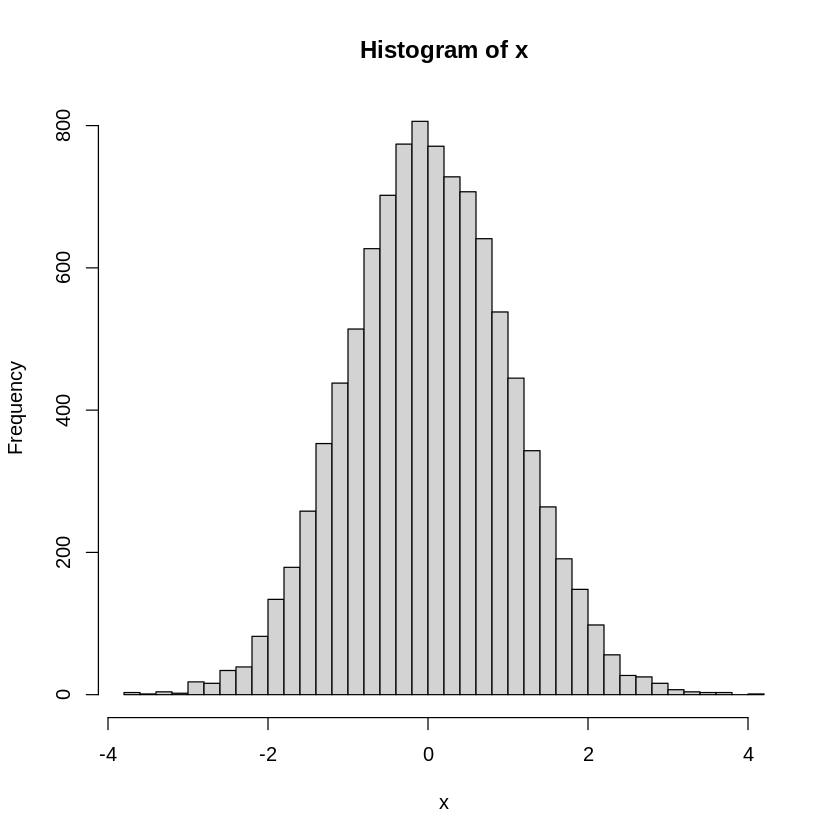

In [ ]:
x = rnorm( 10000)
hist( x , nclass = 40)

## 効果検証実装

In [ ]:
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library('tidyverse')

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Rによるメールマーケティングデータの分析（回帰編）

In [ ]:
email_data <- read_csv("http://www.minethatdata.com/Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv")

Rows: 64000 Columns: 12

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): history_segment, zip_code, channel, segment
dbl (8): recency, history, mens, womens, newbie, visit, conversion, spend


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [ ]:
head(email_data,2)

recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0
6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0


In [ ]:
male_df <- email_data %>%
filter(segment != 'Womens E-Mail') %>%
mutate(treatment = if_else(segment =='Mens E-Mail', 1, 0))

In [ ]:
head(male_df,5)

recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,treatment
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0,0
9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0,1
9,5) $500 - $750,675.07,1,1,Rural,1,Phone,Mens E-Mail,0,0,0,1
2,2) $100 - $200,101.64,0,1,Urban,0,Web,Mens E-Mail,1,0,0,1
4,3) $200 - $350,241.42,0,1,Rural,1,Multichannel,No E-Mail,0,0,0,0


In [ ]:
summary_by_segment <- male_df %>%

group_by(treatment) %>%
summarise(conversion_rate = mean(conversion),
spend_mean = mean(spend),
count = n())

In [ ]:
summary_by_segment

treatment,conversion_rate,spend_mean,count
<dbl>,<dbl>,<dbl>,<int>
0,0.005726087,0.6527894,21306
1,0.012531093,1.4226165,21307


In [ ]:
mens_mail <- male_df %>%
filter(treatment == 1) %>%
pull(spend)

no_mail <- male_df %>%
filter(treatment == 0) %>%
pull(spend)

rct_ttest <- t.test(mens_mail, no_mail, var.equal = TRUE)
rct_ttest


	Two Sample t-test

data:  mens_mail and no_mail
t = 5.3001, df = 42611, p-value = 1.163e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.4851384 1.0545160
sample estimates:
mean of x mean of y 
1.4226165 0.6527894 


In [ ]:
head(male_df,5)

recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,treatment
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0,0
9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0,1
9,5) $500 - $750,675.07,1,1,Rural,1,Phone,Mens E-Mail,0,0,0,1
2,2) $100 - $200,101.64,0,1,Urban,0,Web,Mens E-Mail,1,0,0,1
4,3) $200 - $350,241.42,0,1,Rural,1,Multichannel,No E-Mail,0,0,0,0


In [ ]:
set.seed(1)
obs_rate_c <- 0.5
obs_rate_t <- 0.5

In [ ]:
biased_data <- male_df %>%
mutate(obs_rate_c = if_else(
    (history > 300) | (recency < 6) | (channel == 'MUltichannel'),
    obs_rate_c, 1),
    obs_rate_t = if_else(
    (history > 300) | (recency < 6) | (channel == 'Multichannel'),
    1, obs_rate_t),
    random_number = runif(n = NROW(male_df))) %>%
    filter((treatment == 0 & random_number < obs_rate_c) |
    (treatment == 1 & random_number < obs_rate_t))

In [ ]:
head(biased_data,)

recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,treatment,obs_rate_c,obs_rate_t,random_number
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0,0,0.5,1,0.2655087
9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0,1,0.5,1,0.3721239
9,5) $500 - $750,675.07,1,1,Rural,1,Phone,Mens E-Mail,0,0,0,1,0.5,1,0.5728534
2,2) $100 - $200,101.64,0,1,Urban,0,Web,Mens E-Mail,1,0,0,1,0.5,1,0.9082078
4,3) $200 - $350,241.42,0,1,Rural,1,Multichannel,No E-Mail,0,0,0,0,0.5,1,0.2016819
5,1) $0 - $100,29.99,1,0,Surburban,0,Phone,Mens E-Mail,0,0,0,1,0.5,1,0.9446753


In [ ]:
summary_by_segment_biased <- biased_data %>%
group_by(treatment) %>%
summarise(
    conversion_rate = mean(conversion),
    spend_mean = mean(spend),
    count = n())

In [ ]:
mens_mail_biased <- biased_data %>%
filter(treatment == 1) %>%
pull(spend)

no_mail_biased <-biased_data %>%
filter(treatment == 0) %>%
pull(spend)

rct_ttest_biased <- t.test(mens_mail_biased, no_mail_biased, var.equal = T)

In [ ]:
summary_by_segment_biased

treatment,conversion_rate,spend_mean,count
<dbl>,<dbl>,<dbl>,<int>
0,0.004925444,0.5425349,14821
1,0.013431794,1.5277526,17198


In [ ]:
rct_ttest_biased


	Two Sample t-test

data:  mens_mail_biased and no_mail_biased
t = 5.7345, df = 32017, p-value = 9.869e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.6484712 1.3219643
sample estimates:
mean of x mean of y 
1.5277526 0.5425349 


In [ ]:
biased_reg <- lm(
    data = biased_data, formula = spend ~ treatment + history #formula（回帰式）
)
summary(biased_reg)


Call:
lm(formula = spend ~ treatment + history, data = biased_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -4.74  -1.46  -1.26  -0.47 497.74 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.3183431  0.1435646   2.217  0.02660 *  
treatment   0.9089568  0.1733766   5.243 1.59e-07 ***
history     0.0010909  0.0003358   3.249  0.00116 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.33 on 32016 degrees of freedom
Multiple R-squared:  0.001355,	Adjusted R-squared:  0.001293 
F-statistic: 21.73 on 2 and 32016 DF,  p-value: 3.726e-10


In [ ]:
library('broom')
biased_reg_coef <- tidy(biased_reg)
biased_reg_coef

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.318343106,0.1435645721,2.217421,2.660133e-02
treatment,0.908956788,0.1733766026,5.242673,1.592703e-07
history,0.001090905,0.0003357575,3.249087,1.158954e-03


In [ ]:
## RCTデータでの単回帰
rct_reg <- lm(data =  male_df, formula = spend ~ treatment )
rct_reg_coef <- summary(rct_reg) %>% tidy()

nonrct_reg  <- lm(data = biased_data, formula = spend ~ treatment)
nonrct_reg_coef <- summary(nonrct_reg) %>% tidy()
tidy

# rct_reg_coef
# nonrct_reg_coef

function (x, ...) 
{
    UseMethod("tidy")
}
<bytecode: 0x55995fa37508>
<environment: namespace:generics>

In [ ]:
nonrct_mreg <- lm(data = biased_data,
formula = spend ~ treatment + recency + channel + history)
nonrct_mreg_coef <- tidy(nonrct_mreg)
nonrct_mreg_coef

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.482235964,0.3730881437,1.29255237,1.961753e-01
treatment,0.850686723,0.1775724559,4.79064571,1.669892e-06
recency,-0.040592342,0.0258380908,-1.57102715,1.161862e-01
channelPhone,0.016713862,0.2974769120,0.05618541,9.551945e-01
channelWeb,0.244641636,0.2969202238,0.82393052,4.099852e-01
history,0.001037089,0.0003737514,2.77480977,5.526602e-03


In [ ]:
library(broom)

formula_vec <- c(spend ~ treatment + recency + channel, #モデルA
                spend ~ treatment + recency + channel + history, #モデルB
                history ~ treatment + recency + channel) #モデルC
names(formula_vec) <- paste('reg', LETTERS[1:3], sep = '_')
formula_vec

$reg_A
spend ~ treatment + recency + channel

$reg_B
spend ~ treatment + recency + channel + history

$reg_C
history ~ treatment + recency + channel


In [ ]:
models <- formula_vec %>%
    enframe(name = ' model_index',value='formula')
models

model_index,formula
<chr>,<list>
reg_A,spend ~ treatment + recency + channel
reg_B,spend ~ treatment + recency + channel + history
reg_C,history ~ treatment + recency + channel


In [ ]:
# df_models <- models %>%
#     mutate(model = map(.x = formula, .f = lm, data = biased_data)) %>%
#     mutate(lm_result = map(.x = model, .f = tidy))
#     df_models

In [ ]:
# df_results <- df_models %>%
# mutate(formula = as.character(formula)) %>%
# select(formula, model_index, lm_result) %>%
# unnest(cols = c(lm_result))

In [ ]:
# treatment_cief <-df_results %>%
# filter(term == 'treatment') %>%
# pull(estimate)

# history_coef <- df_results %>%
# filter(model_index =='reg_b',
# term == 'history') %>%
# pull(estimate)

# OVB <- history_coef * treatment_coef[3]
# coef_gap <- treatment_coef[1] -treatment_coef[2]
# OVB
# coef_gap

In [ ]:
install.packages('MatchIt')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppProgress’




In [ ]:
library('MatchIt')

In [ ]:
m_near <- matchit(formula = treatment~recency + history + channel,
data = biased_data,
method = "nearest",
replace =TRUE)

ERROR: ignored